<h2>Detecting FRAUDULENT transactions of ETHEREUM blockchain</h2>


This dataset contains rows of known fraud and valid transactions made over Ethereum, a type of cryptocurrency.

| Column | Description |
|--------|-------------|
| Index | The index number of a row |
| Address | The address of the ethereum account |
| FLAG | Whether the transaction is fraud or not |
| Avg min between sent tnx | Average time between sent transactions for account in minutes |
| Avg min between received tnx | Average time between received transactions for account in minutes |
| Time Diff between first and_last (Mins) | Time difference between the first and last transaction |
| Sent_tnx | Total number of sent normal transactions |
| Received_tnx | Total number of received normal transactions |
| NumberofCreated_Contracts | Total Number of created contract transactions |
| UniqueReceivedFrom_Addresses | Total Unique addresses from which account received transaction |
| UniqueSentTo_Addresses20 | Total Unique addresses from which account sent transactions |
| MinValueReceived | Minimum value in Ether ever received |
| MaxValueReceived | Maximum value in Ether ever received |
| AvgValueReceived5Average value in Ether ever received |
| MinValSent | Minimum value of Ether ever sent |
| MaxValSent | Maximum value of Ether ever sent |
| AvgValSent | Average value of Ether ever sent |
| MinValueSentToContract | Minimum value of Ether sent to a contract |
| MaxValueSentToContract | Maximum value of Ether sent to a contract |
| AvgValueSentToContract | Average value of Ether sent to contracts |
| TotalTransactions(IncludingTnxtoCreate_Contract) | Total number of transactions |
| TotalEtherSent | Total Ether sent for account address |
| TotalEtherReceived | Total Ether received for account address |
| TotalEtherSent_Contracts | Total Ether sent to Contract addresses |
| TotalEtherBalance | Total Ether Balance following enacted transactions |
| TotalERC20Tnxs | Total number of ERC20 token transfer transactions |
| ERC20TotalEther_Received | Total ERC20 token received transactions in Ether |
| ERC20TotalEther_Sent | Total ERC20token sent transactions in Ether |
| ERC20TotalEtherSentContract | Total ERC20 token transfer to other contracts in Ether |
| ERC20UniqSent_Addr | Number of ERC20 token transactions sent to Unique account addresses |
| ERC20UniqRec_Addr | Number of ERC20 token transactions received from Unique addresses |
| ERC20UniqRecContractAddr | Number of ERC20token transactions received from Unique contract addresses |
| ERC20AvgTimeBetweenSent_Tnx | Average time between ERC20 token sent transactions in minutes |
| ERC20AvgTimeBetweenRec_Tnx | Average time between ERC20 token received transactions in minutes |
| ERC20AvgTimeBetweenContract_Tnx | Average time ERC20 token between sent token transactions |
| ERC20MinVal_Rec | Minimum value in Ether received from ERC20 token transactions for account |
| ERC20MaxVal_Rec | Maximum value in Ether received from ERC20 token transactions for account |
| ERC20AvgVal_Rec | Average value in Ether received from ERC20 token transactions for account |
| ERC20MinVal_Sent | Minimum value in Ether sent from ERC20 token transactions for account |
| ERC20MaxVal_Sent | Maximum value in Ether sent from ERC20 token transactions for account |
| ERC20AvgVal_Sent | Average value in Ether sent from ERC20 token transactions for account |
| ERC20UniqSentTokenName | Number of Unique ERC20 tokens transferred |
| RC20UniqRecTokenName | Number of Unique ERC20 tokens received |
| ERC20MostSentTokenType | Most sent token for account via ERC20 transaction |
| ERC20MostRecTokenType | Most received token for account via ERC20 transactions |






<h3>Libraries</h3>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE


<h3>Data Reading</h3>


In [2]:
df = pd.read_csv('transaction_dataset.csv', index_col=0)
print(df.shape)
df.head()


(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
# Ommit first two columns (Index, Adress)
df = df.iloc[:,2:]

<h3>Data information & exploration</h3>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

In [5]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [6]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column -- ERC20 most sent token type-- has --304-- unique values
The categorical column -- ERC20_most_rec_token_type-- has --466-- unique values


In [7]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [8]:
# Inspect features variance
df[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

FLAG
0    7662
1    2179
Name: count, dtype: int64


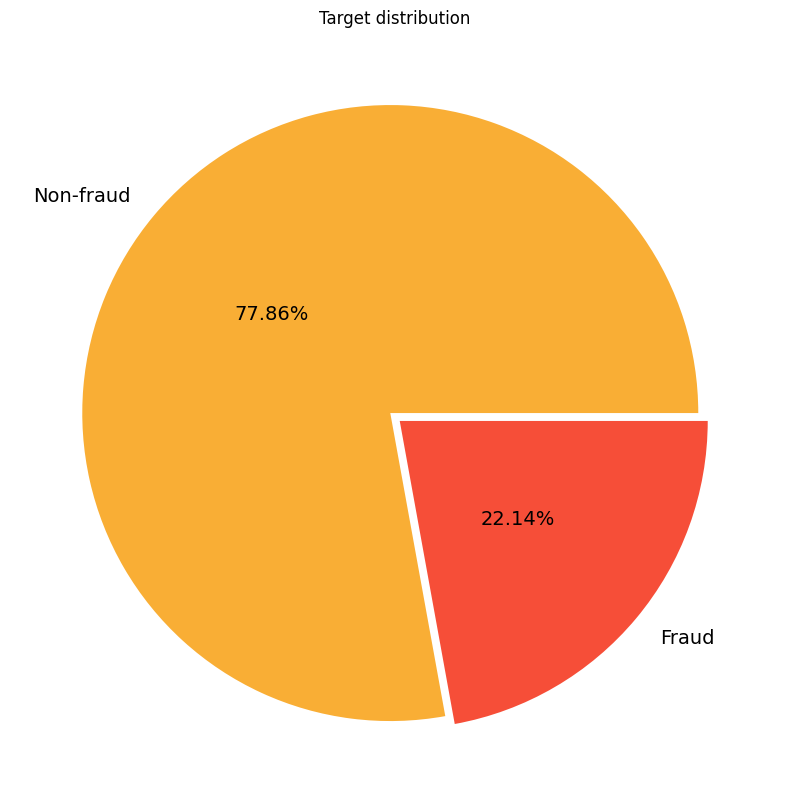

In [9]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

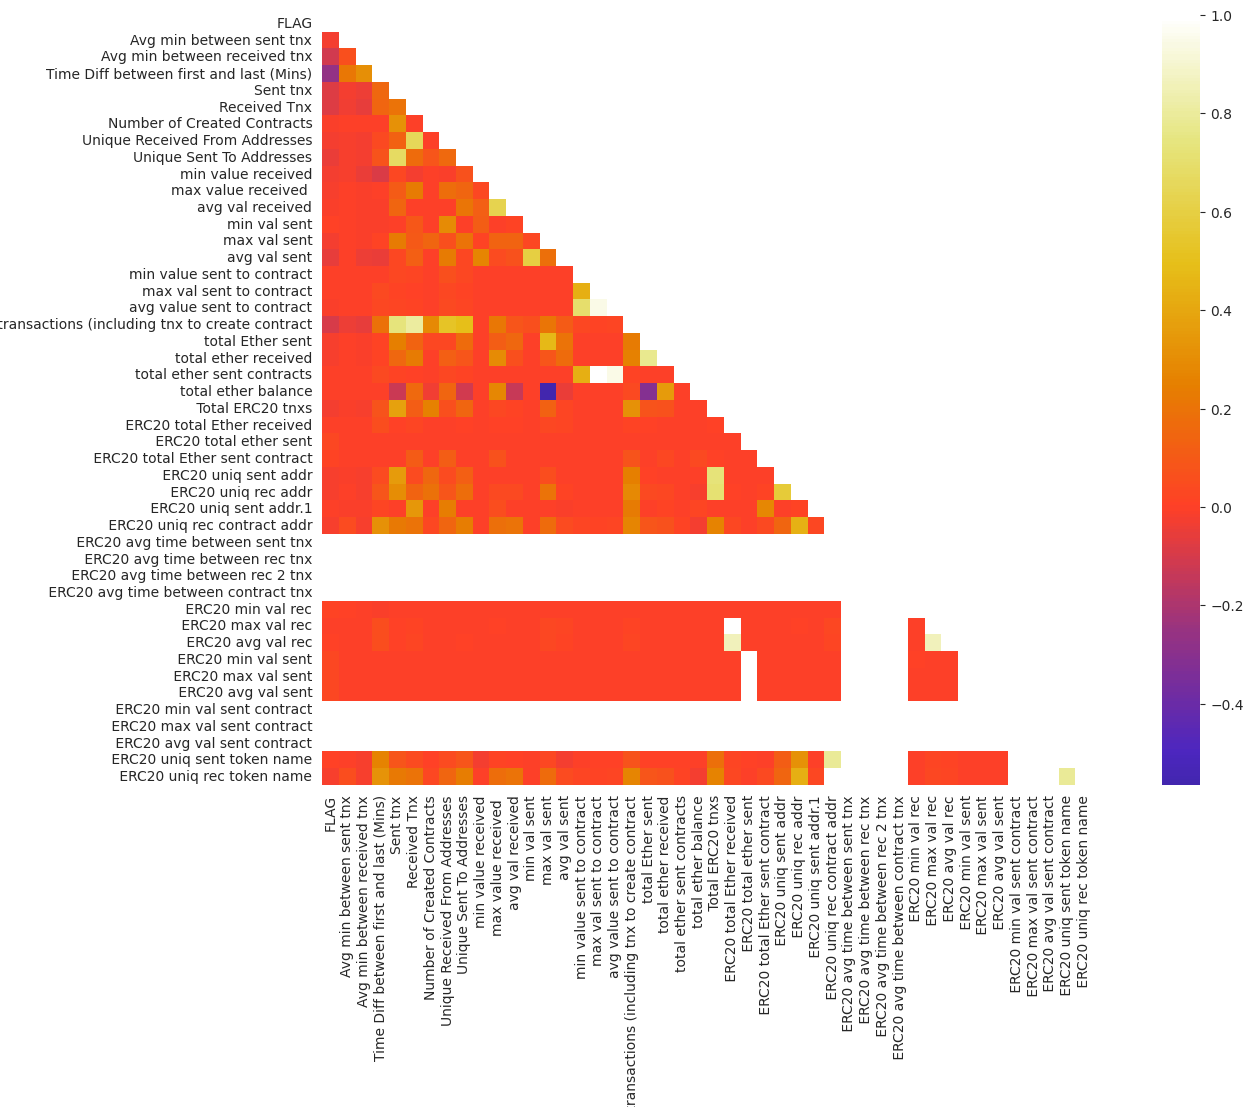

In [10]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.heatmap(corr, mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

<h3>Data Cleaning</h3>

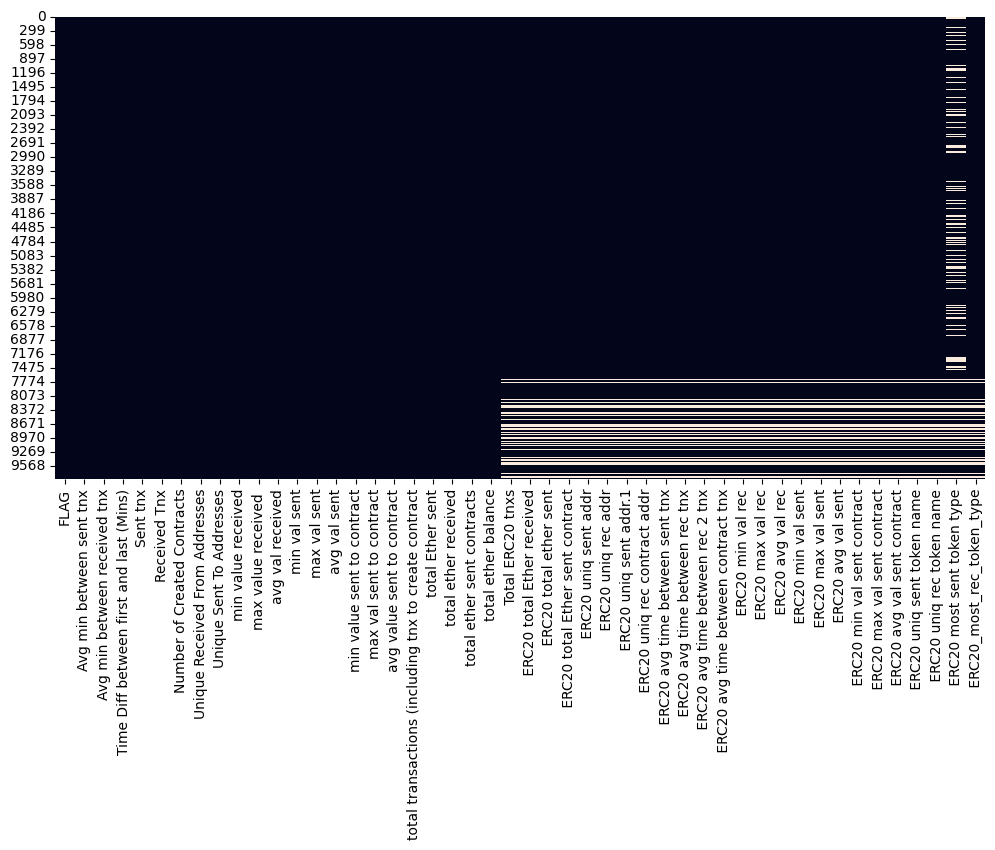

In [11]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [13]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(9841, 46)


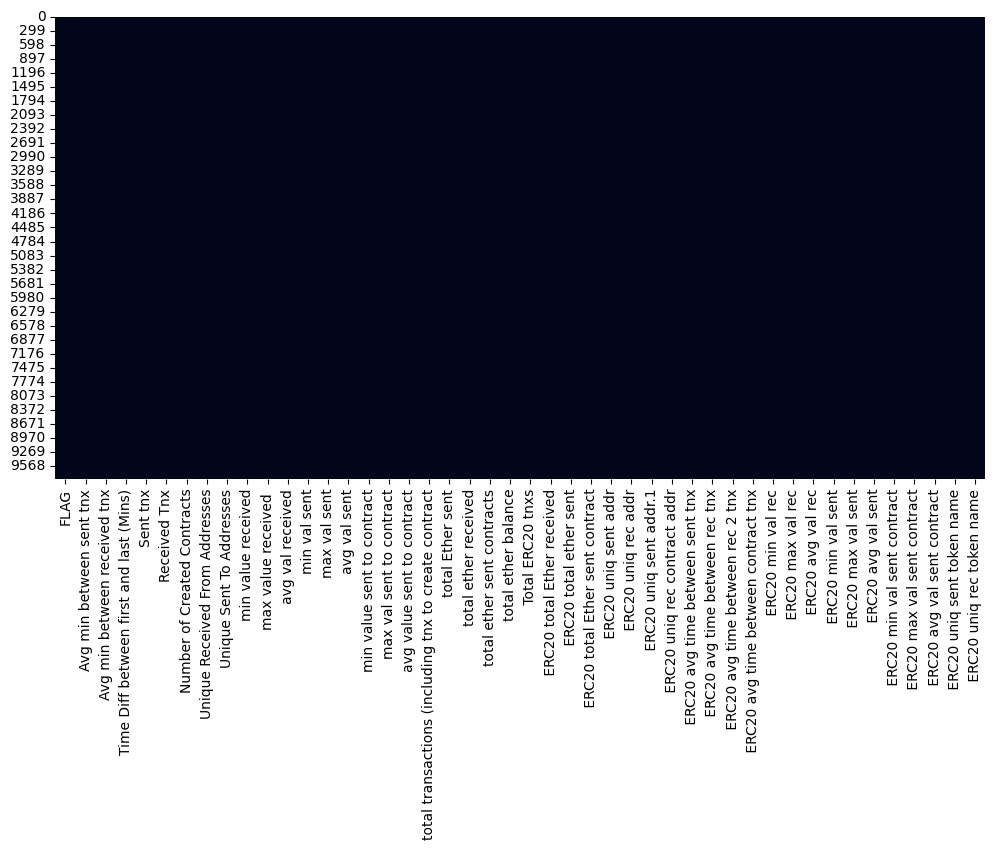

In [14]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [15]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

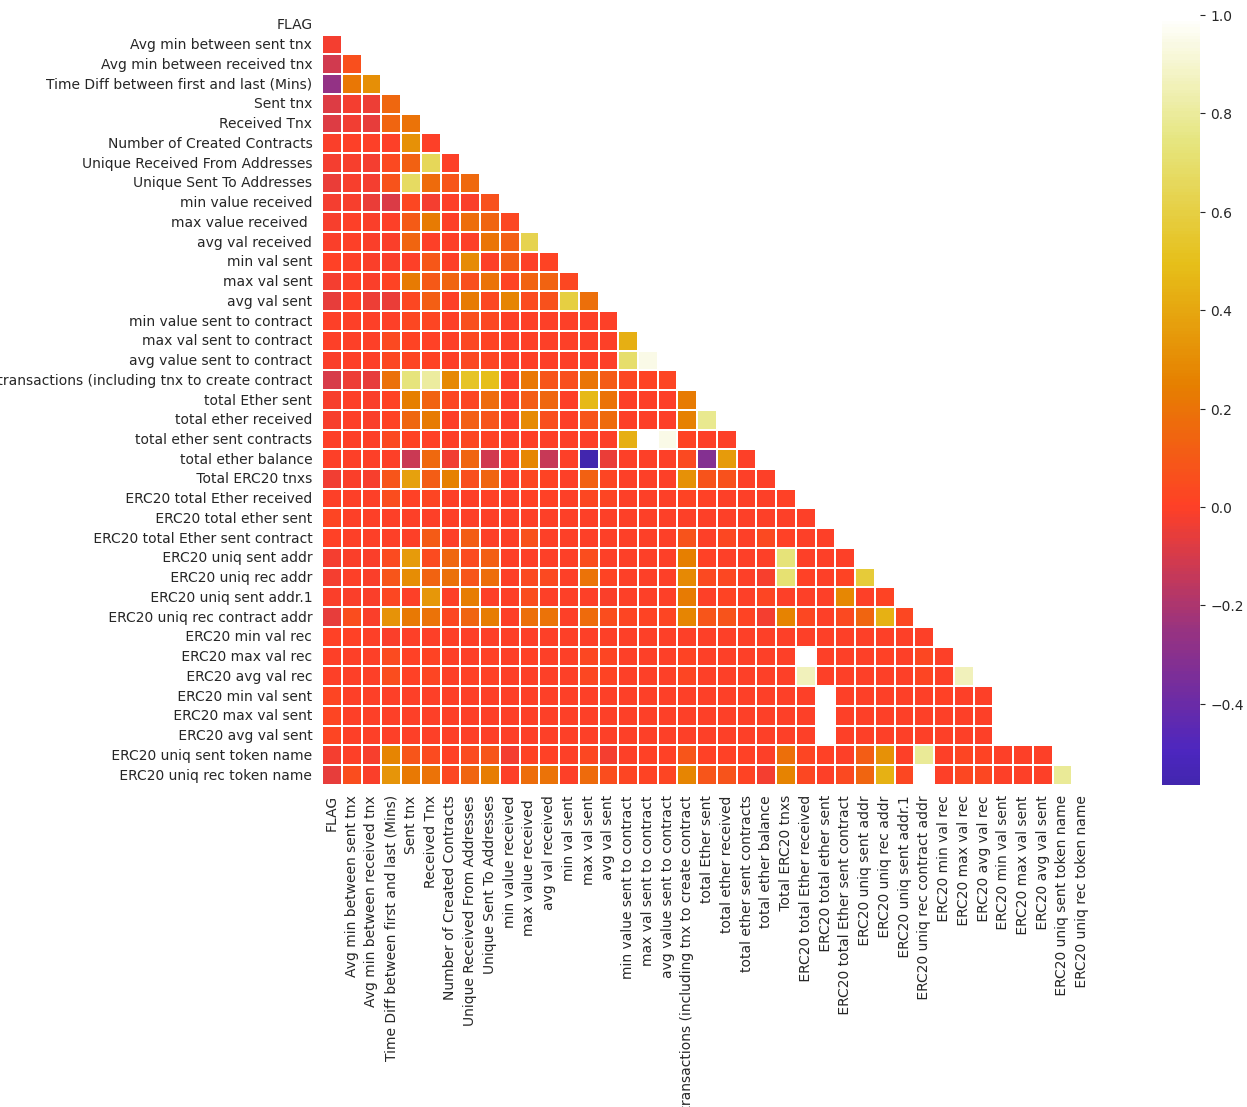

In [17]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

Drop one of those highly correlated features
    

In [18]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

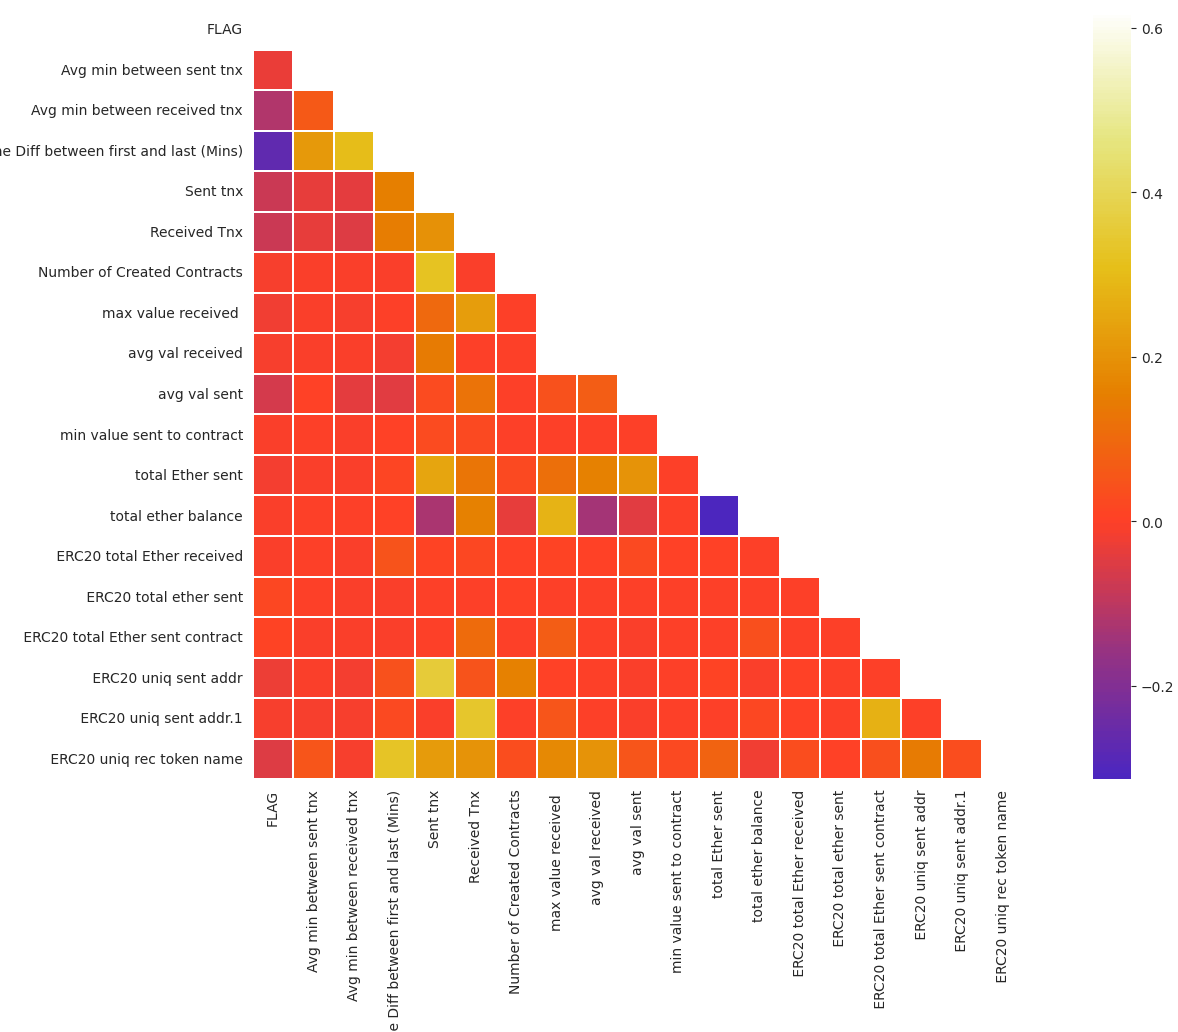

In [19]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [20]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

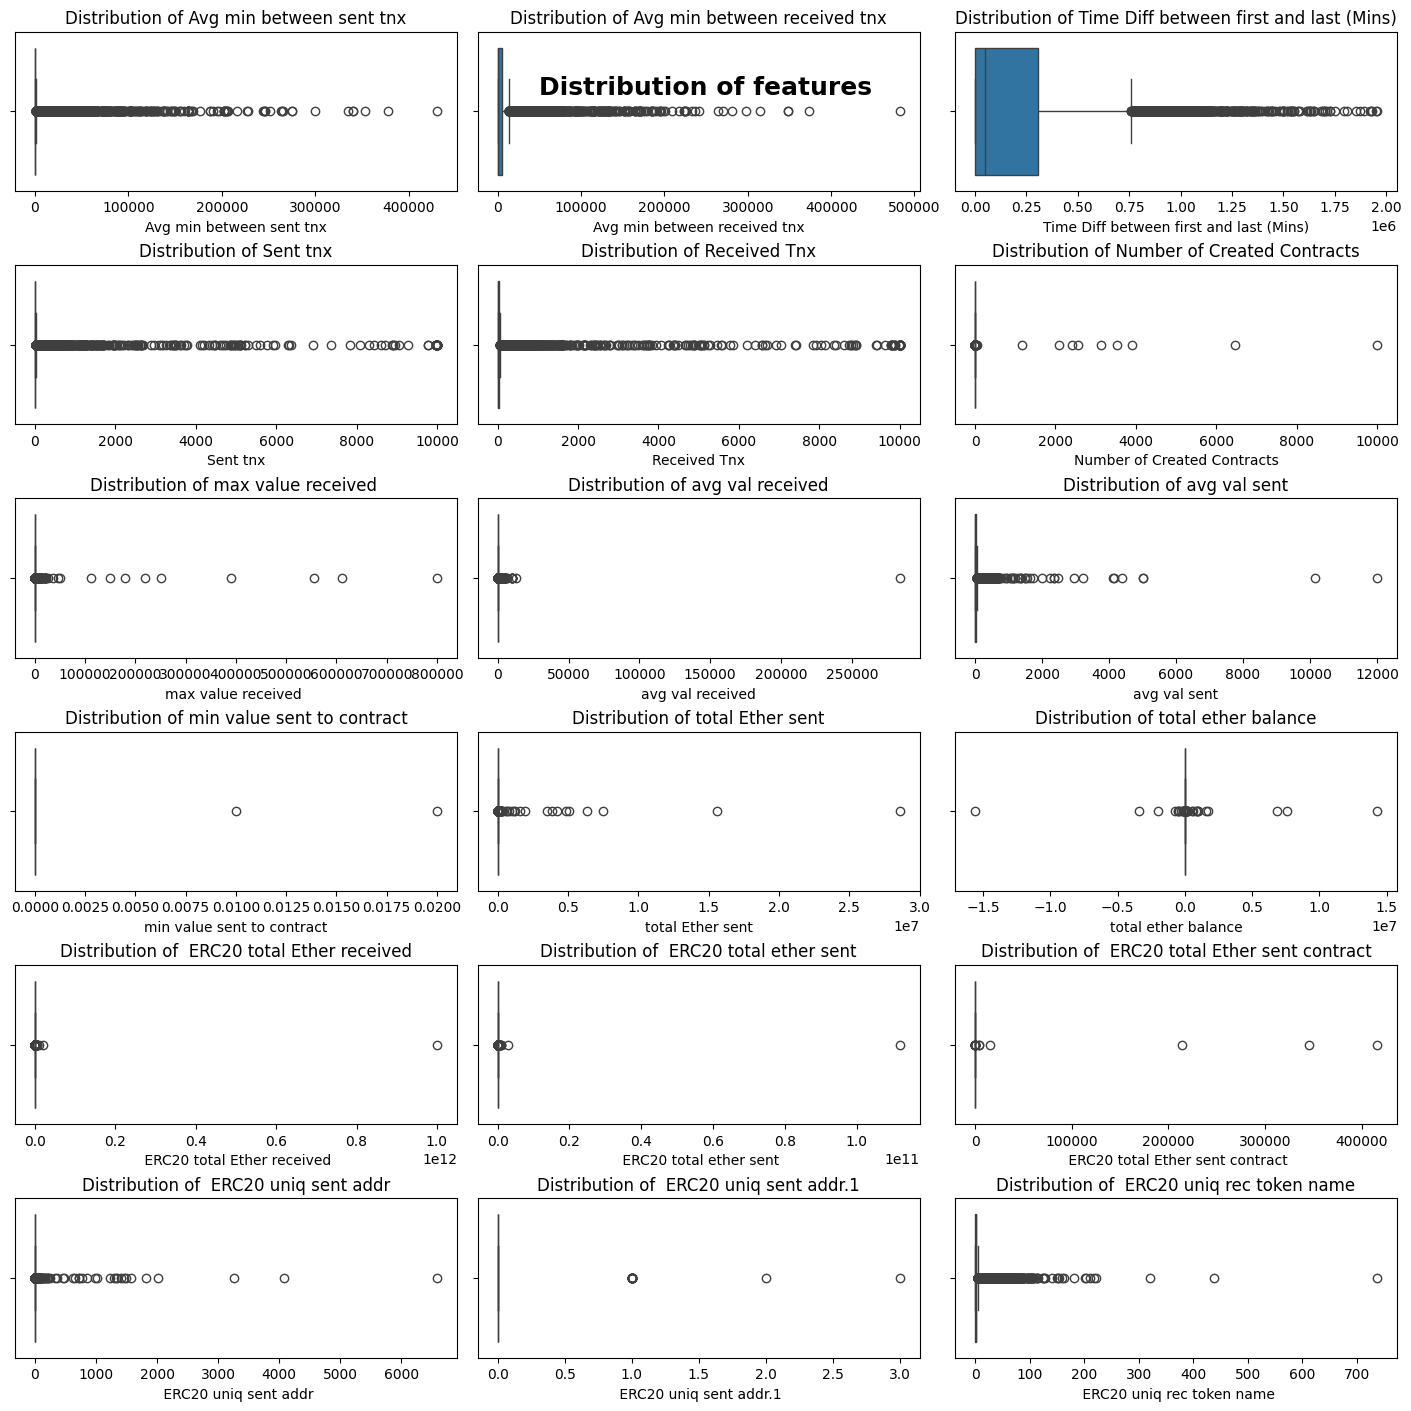

In [21]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [22]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [23]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


<h3>Data Preparation</h3>

In [24]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [25]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [26]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [27]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,1.294061,1.151313,1.393751,1.591951,1.017881,-0.401539,1.170696,0.988757,0.651223,1.416308,-0.007274,1.815951,2.508169,-0.038483,2.398649,1.831406
1,-1.096066,-1.184221,-1.638410,-1.391726,-1.785005,-0.401539,-1.407378,-1.283886,-1.138468,-1.252291,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
2,-0.006354,0.213137,1.103220,1.970707,1.876994,-0.401539,0.613575,-0.995919,-0.869934,1.171479,-0.006819,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
3,-1.096066,1.220438,0.195684,-1.391726,-0.618856,2.490307,-0.871196,-0.822389,-1.138468,-1.252291,-0.006832,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
4,0.628503,-1.121221,-0.904665,-0.206187,-0.618856,-0.401539,0.889875,1.277099,1.332663,0.787323,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-1.096066,0.249518,-0.705997,-0.590325,-0.618856,-0.401539,-0.535113,-0.269750,0.183532,-0.463079,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
7868,1.128623,0.633621,0.895636,0.707356,1.432439,-0.401539,0.339924,-0.354586,1.043745,1.010645,-0.006835,1.611838,-0.410600,-0.038483,-0.437145,1.238838
7869,-1.096066,-1.184221,-1.154101,-0.590325,-1.004903,-0.401539,-1.275895,-1.091970,-0.960939,-1.159157,-0.006835,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
7870,1.385084,0.988959,0.715180,0.707356,0.556810,-0.401539,1.858790,1.531808,1.671553,1.592460,-0.006835,1.514388,-0.410600,-0.038483,-0.437145,1.122262


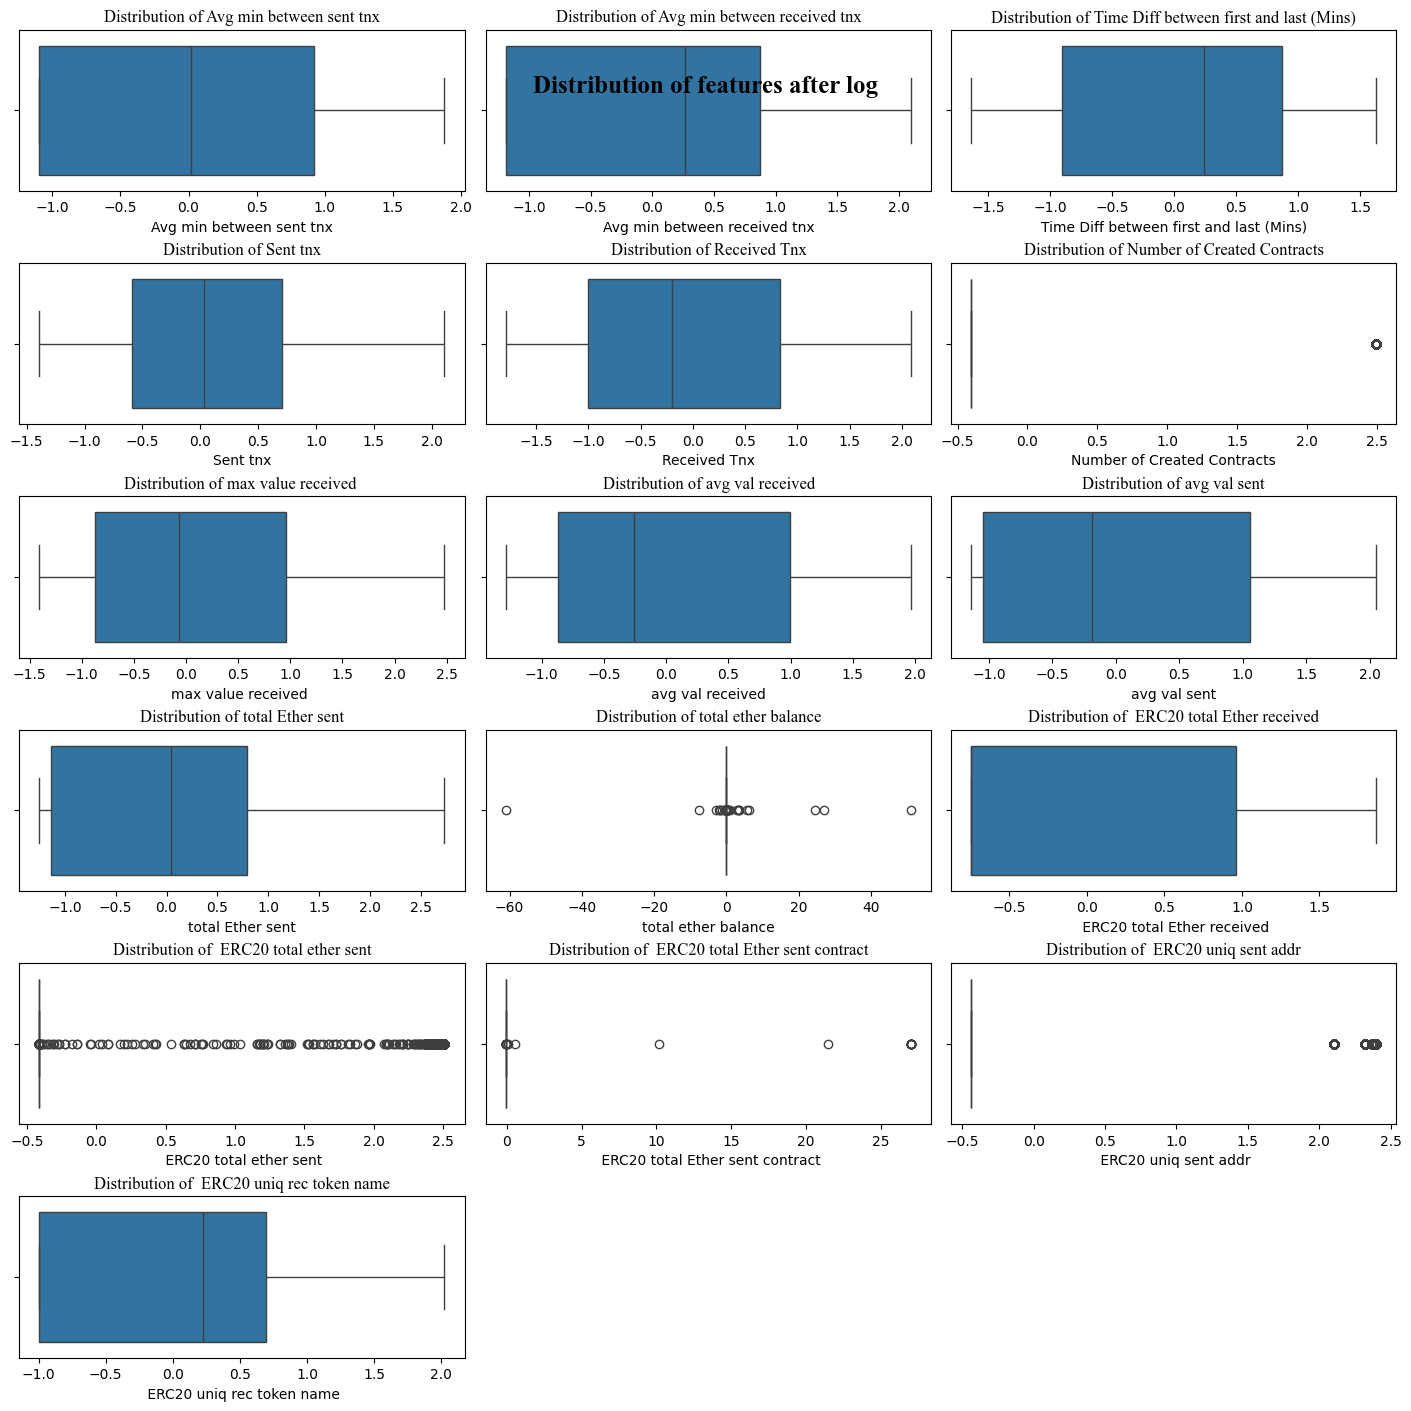

In [28]:
# Distribution of features after log transformation

b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
axes[-1, -1].axis('off') # hide axes
axes[-1, -2].axis('off') # hide axes
plt.suptitle("Distribution of features after log",y=0.95, family='Times New Roman', size=18, weight='bold')
 
ax = sns.boxplot(ax = axes[0,0], data=norm_df, x=norm_df.columns[0])
ax.set_title(f'Distribution of {norm_df.columns[0]}', fontname='Times New Roman')
 
ax1 = sns.boxplot(ax = axes[0,1], data=norm_df, x=norm_df.columns[1])
ax1.set_title(f'Distribution of {norm_df.columns[1]}', fontname='Times New Roman')
 
ax2 = sns.boxplot(ax = axes[0,2], data=norm_df, x=norm_df.columns[2])
ax2.set_title(f'Distribution of {norm_df.columns[2]}', fontname='Times New Roman')
 
ax3 = sns.boxplot(ax = axes[1,0], data=norm_df, x=norm_df.columns[3])
ax3.set_title(f'Distribution of {norm_df.columns[3]}', fontname='Times New Roman')
 
ax4 = sns.boxplot(ax = axes[1,1], data=norm_df, x=norm_df.columns[4])
ax4.set_title(f'Distribution of {norm_df.columns[4]}', fontname='Times New Roman')
 
ax5 = sns.boxplot(ax = axes[1,2], data=norm_df, x=norm_df.columns[5])
ax5.set_title(f'Distribution of {norm_df.columns[5]}', fontname='Times New Roman')
 
ax6 = sns.boxplot(ax = axes[2,0], data=norm_df, x=norm_df.columns[6])
ax6.set_title(f'Distribution of {norm_df.columns[6]}', fontname='Times New Roman')
 
ax7 = sns.boxplot(ax = axes[2,1], data=norm_df, x=norm_df.columns[7])
ax7.set_title(f'Distribution of {norm_df.columns[7]}', fontname='Times New Roman')
 
ax8 = sns.boxplot(ax = axes[2,2], data=norm_df, x=norm_df.columns[8])
ax8.set_title(f'Distribution of {norm_df.columns[8]}', fontname='Times New Roman')
 
ax9 = sns.boxplot(ax = axes[3,0], data=norm_df, x=norm_df.columns[9])
ax9.set_title(f'Distribution of {norm_df.columns[9]}', fontname='Times New Roman')

ax10 = sns.boxplot(ax = axes[3,1], data=norm_df, x=norm_df.columns[10])
ax10.set_title(f'Distribution of {norm_df.columns[10]}', fontname='Times New Roman')
 
ax11 = sns.boxplot(ax = axes[3,2], data=norm_df, x=norm_df.columns[11])
ax11.set_title(f'Distribution of {norm_df.columns[11]}', fontname='Times New Roman')
 
ax12 = sns.boxplot(ax = axes[4,0], data=norm_df, x=norm_df.columns[12])
ax12.set_title(f'Distribution of {norm_df.columns[12]}', fontname='Times New Roman')
 
ax13 = sns.boxplot(ax = axes[4,1], data=norm_df, x=norm_df.columns[13])
ax13.set_title(f'Distribution of {norm_df.columns[13]}', fontname='Times New Roman')
 
ax14 = sns.boxplot(ax = axes[4,2], data=norm_df, x=norm_df.columns[14])
ax14.set_title(f'Distribution of {norm_df.columns[14]}', fontname='Times New Roman')
 
ax15 = sns.boxplot(ax = axes[5,0], data=norm_df, x=norm_df.columns[15])
ax15.set_title(f'Distribution of {norm_df.columns[15]}', fontname='Times New Roman')

plt.show()

<h3>Handling the imbalance</h3>


Oversampling using SMOTE

In [29]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))
Shape of the training after SMOTE: ((12230, 16), (12230,))


In [30]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFrauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 6116


<h3>Modeling</h3>

**Logistic Regression**

In [31]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
norm_test_f = norm.transform(X_test)

preds = LR.predict(norm_test_f)

In [32]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1547
1     422
Name: count, dtype: int64

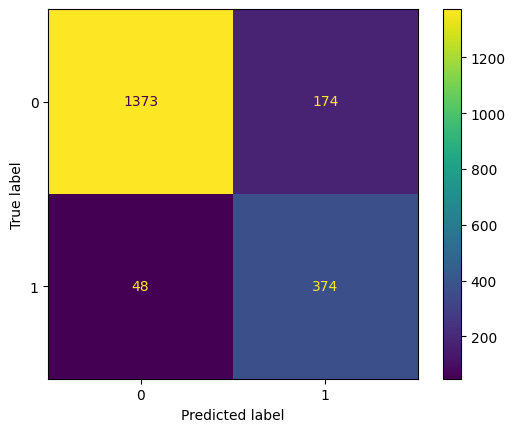

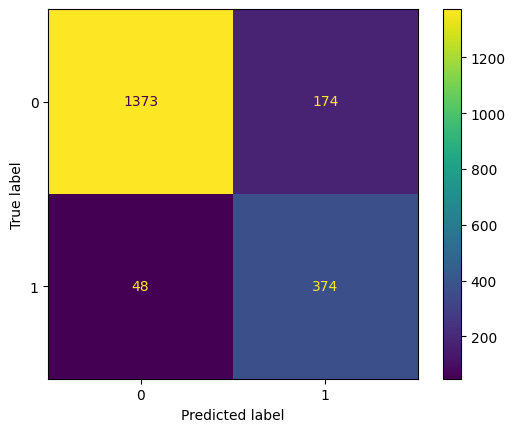

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1547
           1       0.68      0.89      0.77       422

    accuracy                           0.89      1969
   macro avg       0.82      0.89      0.85      1969
weighted avg       0.91      0.89      0.89      1969

[[1373  174]
 [  48  374]]


In [33]:
y_pred = LR.predict(norm_test_f)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.plot()
plt.show()
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Considering the confusion matrix:
 - LR model, correctly identified 371 (TP) of FRAUD cases, out of 422 (P).
 - LR model flagged as FRAUD 171 (FP) out of 1547, when this cases were actually NON-FRAUD
 

Dealing with a fraud detection scenario, we care more about the transactions that were actualy FRAUDS, but which were treated as NON-FRAUD by our model (FN - 51) TYPE II ERROR

Therby, let's try to increase the recall using other methods.


**Hyperparameter tuning for Logistic regression**

In [34]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_tr_resample, y_tr_resample)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


**Random Forest Classifier**

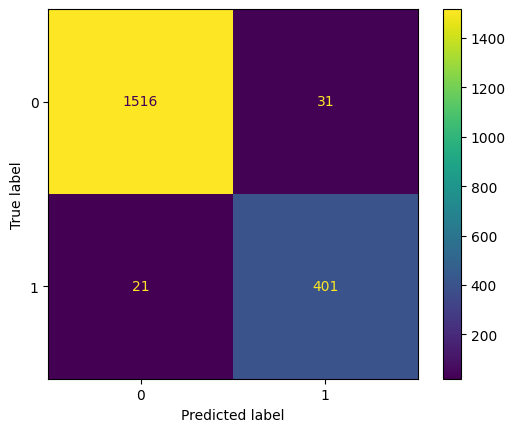

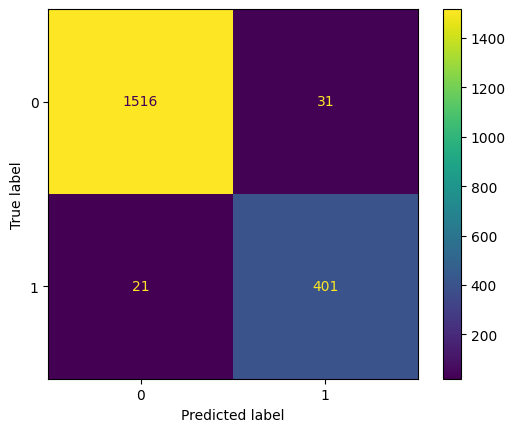

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1516   31]
 [  21  401]]


In [35]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(norm_test_f)
y_pred = LR.predict(norm_test_f)
disp = ConfusionMatrixDisplay.from_predictions(y_test, preds_RF)
disp.plot()
plt.show()

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

**Hyperparameter tuning for Random forest classfier**

In [36]:
# Define the parameter grid
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_RF, cv=5)

# Fit the grid search to the training data
grid_search_RF.fit(x_tr_resample, y_tr_resample)

# Get the best hyperparameters
best_params_RF = grid_search_RF.best_params_
print("Best Hyperparameters (RF):", best_params_RF)

Best Hyperparameters (RF): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


The RF classifier seems to produce more efective results
 - Both FP and FN are reduced considerably increasing the recall & precision
 - Using RF, the model fails to detect 24 FRAUD cases. 


Let's see if we can increase these results.

**XGB Classifier**

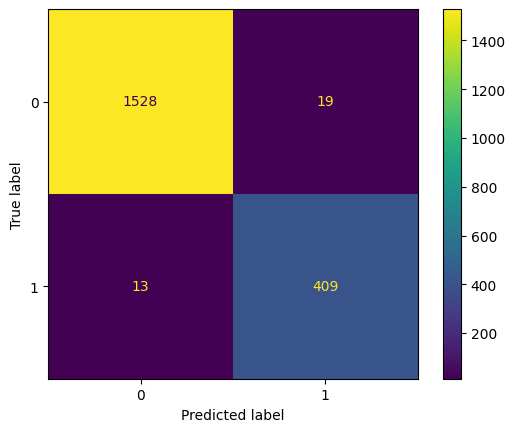

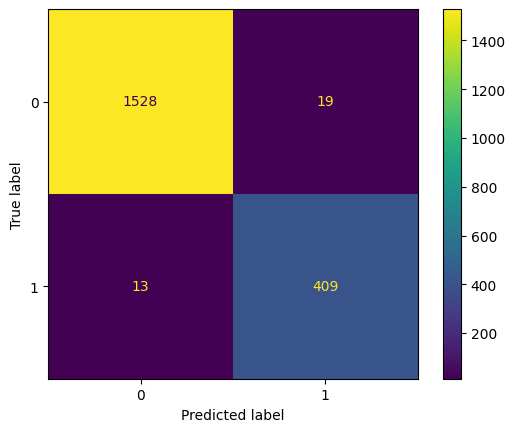

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.97      0.96       422

    accuracy                           0.98      1969
   macro avg       0.97      0.98      0.98      1969
weighted avg       0.98      0.98      0.98      1969

[[1528   19]
 [  13  409]]


In [37]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(norm_test_f)

disp = ConfusionMatrixDisplay.from_predictions(y_test, preds_xgb)
disp.plot()
plt.show()
print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

The results of XGBClassifier shows that its doing slightly better than the RF when it comes to NON-FRAUD transactions, flagging 24 cases as fraud when they were actually non-fraud.

Wen it comes to identifiying FRAUDS, XGBClassifier missed 15 transactions out of 422, suggesting the best recall score.

Considering that, the XGBClassifier is the choice that we want.

Let's see if we can improve these results.

**Hyperparameters tuning for XGB Classifier**

In [38]:
params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[2,3,4],
               'colsample_bytree':[0.3,0.5,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9887118513526524


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1521   26]
 [  16  406]]


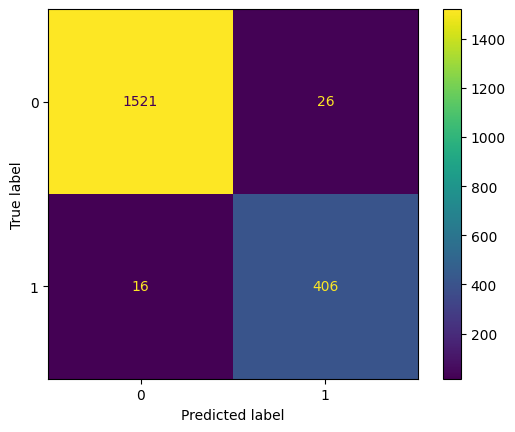

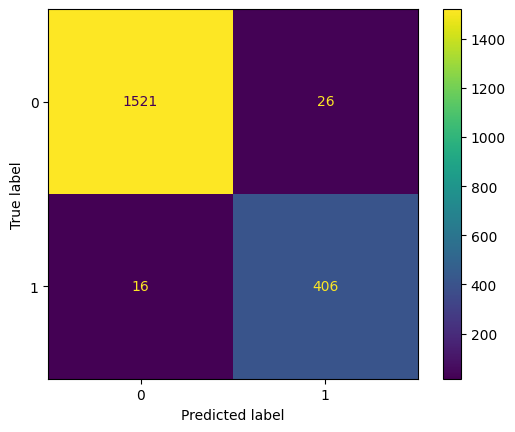

In [39]:
preds_best_xgb = grid.best_estimator_.predict(norm_test_f)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))

disp = ConfusionMatrixDisplay.from_predictions(y_test, preds_best_xgb)
disp.plot()
plt.show()


The confusion matrix shows no significant improvement, the results are very similar with those obtained by the untuned model.

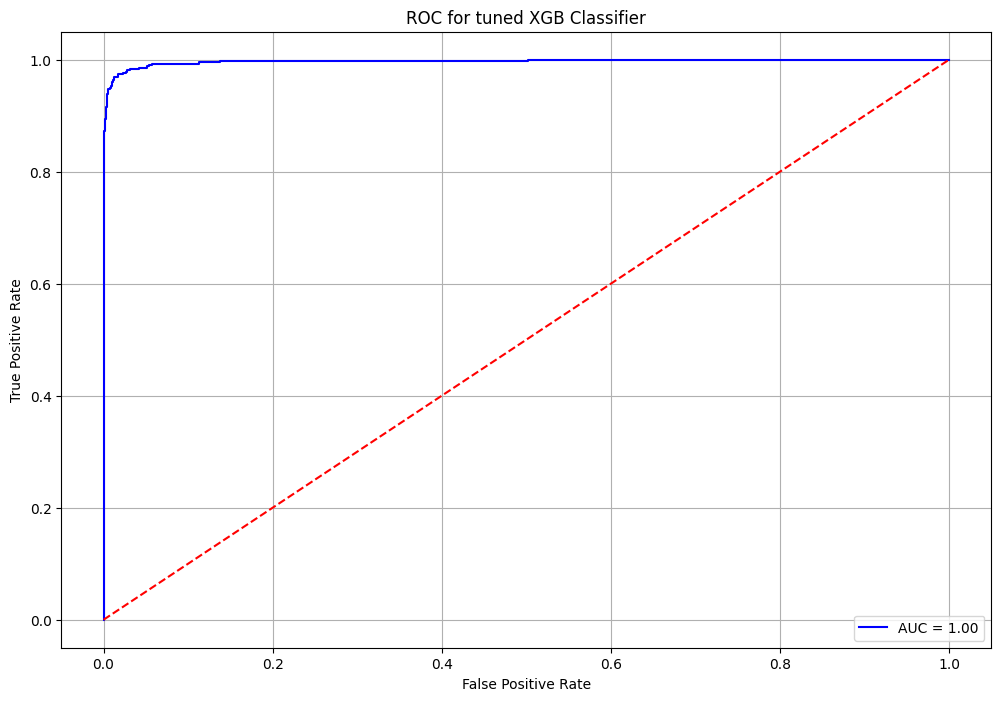

In [40]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

**Comparison of model's preformance**


In [41]:

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_preds = LR.predict(norm_test_f)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1_score = f1_score(y_test, lr_preds)
lr_roc_auc = roc_auc_score(y_test, lr_preds)

# Random Forest
rf_preds = RF.predict(norm_test_f)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)

# XGBoost
xgb_preds = xgb_c.predict(norm_test_f)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)
xgb_roc_auc = roc_auc_score(y_test, xgb_preds)

# Create a dictionary with the performance metrics
data = {
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, xgb_accuracy, lr_accuracy],
    'Precision': [rf_precision, xgb_precision, lr_precision],
    'Recall': [rf_recall, xgb_recall, lr_recall],
    'F1 Score': [rf_f1_score, xgb_f1_score, lr_f1_score],
    'ROC AUC Score': [rf_roc_auc, xgb_roc_auc, lr_roc_auc]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Random Forest,0.973591,0.928241,0.950237,0.939110,0.965099
1,XGBoost,0.983748,0.955607,0.969194,0.962353,0.978456
2,Logistic Regression,0.887252,0.682482,0.886256,0.771134,0.886890


**Stacking ansamble**




In [42]:
# Normalize the test features
norm_test_f = norm.transform(X_test)

# Oversampling using SMOTE
oversample = SMOTE(random_state=123)
X_train_res, y_train_res = oversample.fit_resample(norm_train_f, y_train)

**Using a XGBoost as meta model**


In [43]:
# Initialize the base models
model1 = LogisticRegression(random_state=123)
model2 = RandomForestClassifier(random_state=123)
model3 = XGBClassifier(random_state=123)

# Initialize the meta-model
meta_model = XGBClassifier(random_state=123)

# Initialize the StackingCV classifier
stacking_model = StackingCVClassifier(classifiers=[model1, model2, model3],
                                      meta_classifier=meta_model,
                                      random_state=123)

# Fit the model to the oversampled training data
stacking_model.fit(X_train_res, y_train_res)

# Make predictions
stacking_preds = stacking_model.predict(norm_test_f)

# Evaluate the model
stacking_accuracy = accuracy_score(y_test, stacking_preds)
stacking_precision = precision_score(y_test, stacking_preds)
stacking_recall = recall_score(y_test, stacking_preds)
stacking_f1_score = f1_score(y_test, stacking_preds)
stacking_roc_auc = roc_auc_score(y_test, stacking_preds)

# Create a DataFrame with the evaluation metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Stacking': [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score, stacking_roc_auc]
}

df_metrics = pd.DataFrame(data)

df_metrics

,Metric,Stacking
0,Accuracy,0.980193
1,Precision,0.954869
2,Recall,0.952607
3,F1 Score,0.953737
4,ROC AUC Score,0.970162


**Using Logistic regression as meta model**

In [44]:
# Initialize the meta-model
meta_model = LogisticRegression(random_state=123)

# Initialize the StackingCV classifier
stacking_model = StackingCVClassifier(classifiers=[model1, model2, model3],
                                      meta_classifier=meta_model,
                                      random_state=123)

# Fit the model to the oversampled training data
stacking_model.fit(X_train_res, y_train_res)

# Make predictions
stacking_preds = stacking_model.predict(norm_test_f)

# Evaluate the model
stacking_accuracy = accuracy_score(y_test, stacking_preds)
stacking_precision = precision_score(y_test, stacking_preds)
stacking_recall = recall_score(y_test, stacking_preds)
stacking_f1_score = f1_score(y_test, stacking_preds)
stacking_roc_auc = roc_auc_score(y_test, stacking_preds)

# Create a DataFrame with the evaluation metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Stacking': [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score, stacking_roc_auc]
}

df_metrics = pd.DataFrame(data)

df_metrics

,Metric,Stacking
0,Accuracy,0.974099
1,Precision,0.926437
2,Recall,0.954976
3,F1 Score,0.940490
4,ROC AUC Score,0.967146


**Using Random forest as meta model**

In [45]:
# Initialize the meta-model
meta_model = RandomForestClassifier(random_state=123)

# Initialize the StackingCV classifier
stacking_model = StackingCVClassifier(classifiers=[model1, model2, model3],
                                      meta_classifier=meta_model,
                                      random_state=123)

# Fit the model to the oversampled training data
stacking_model.fit(X_train_res, y_train_res)

# Make predictions
stacking_preds = stacking_model.predict(norm_test_f)

# Evaluate the model
stacking_accuracy = accuracy_score(y_test, stacking_preds)
stacking_precision = precision_score(y_test, stacking_preds)
stacking_recall = recall_score(y_test, stacking_preds)
stacking_f1_score = f1_score(y_test, stacking_preds)
stacking_roc_auc = roc_auc_score(y_test, stacking_preds)

# Create a DataFrame with the evaluation metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Stacking': [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score, stacking_roc_auc]
}

df_metrics = pd.DataFrame(data)

df_metrics

,Metric,Stacking
0,Accuracy,0.980193
1,Precision,0.954869
2,Recall,0.952607
3,F1 Score,0.953737
4,ROC AUC Score,0.970162


**Comparison of Stacking ansamble and best performing model XGBoost**

Stacking ansamble

In [46]:
def stacking_ensemble(meta_model, X_train_res, y_train_res, norm_test_f, y_test):
    # Initialize the base models
    model1 = LogisticRegression(random_state=123)
    model2 = RandomForestClassifier(random_state=123)
    model3 = XGBClassifier(random_state=123)

    # Initialize the StackingCV classifier
    stacking_model = StackingCVClassifier(classifiers=[model1, model2, model3],
                                          meta_classifier=meta_model,
                                          random_state=123)

    # Fit the model to the oversampled training data
    stacking_model.fit(X_train_res, y_train_res)

    # Make predictions
    stacking_preds = stacking_model.predict(norm_test_f)

    # Evaluate the model
    stacking_accuracy = accuracy_score(y_test, stacking_preds)
    stacking_precision = precision_score(y_test, stacking_preds)
    stacking_recall = recall_score(y_test, stacking_preds)
    stacking_f1_score = f1_score(y_test, stacking_preds)
    stacking_roc_auc = roc_auc_score(y_test, stacking_preds)

    return [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score, stacking_roc_auc]

# List of meta-models
meta_models = [LogisticRegression(random_state=123), RandomForestClassifier(random_state=123), XGBClassifier(random_state=123)]

# DataFrame to store the results
df_metrics = pd.DataFrame(columns=['Meta-Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

# Evaluate each meta-model
for i, meta_model in enumerate(meta_models):
    metrics = stacking_ensemble(meta_model, X_train_res, y_train_res, norm_test_f, y_test)
    df_metrics.loc[i] = [meta_model.__class__.__name__] + metrics

df_metrics

,Meta-Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,LogisticRegression,0.974099,0.926437,0.954976,0.940490,0.967146
1,RandomForestClassifier,0.980193,0.954869,0.952607,0.953737,0.970162
2,XGBClassifier,0.980193,0.954869,0.952607,0.953737,0.970162


Best performing single model XGBoost


In [47]:
data = {
    'Model': ['XGBoost'],
    'Accuracy': [xgb_accuracy],
    'Precision': [xgb_precision],
    'Recall': [xgb_recall],
    'F1 Score': [xgb_f1_score],
    'ROC AUC Score': [xgb_roc_auc]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,XGBoost,0.983748,0.955607,0.969194,0.962353,0.978456


In [48]:
# Save the model for further use
pickle_out = open('XGB_FRAUD.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()